## Assignment 2
## Weight: 20%
## Unit - COMP329: Artificial Intelligence
## Date of Release: 18 October, 2018
## Date of Submission: 07 November, 2018 [11: 55 pm]


### Write your Details below:

# The goal of this assignment is to appreciate the power of Evolutionary Algorithms (e.g., Genetic Algorithm, or GA in short) for solving real-world problems such as the Travelling Salesman Problem (TSP) and simple adversarial games such as Tic-Tac-Toe.

## Travelling Salesman Problem:
### Acknowledgment: 
#### The following is largely based on Peter Norvig's note on TSP: (https://github.com/norvig/pytudes/blob/master/ipynb/TSP.ipynb)
#### Given a set of cities and the distance between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?

<img src="tsp.png">

#### Let's us define the problem more precisely
- ***Given a set of cities***
<br>A Python `set` could represent a set of cities. An individual city might be just an integer index, or it might be (x, y) coordinates.
- ... ***and the distance between each pair of cities***: 
<br>We could use either a function, `distance(A, B),` or a table, `distance[A, B]`.
- ... ***what is the shortest possible tour***
<br>A tour is a sequential order in which to visit the cities; a function `shortest_tour(tours)` should find the one that minimizes `tour_length(tour)`, which is the sum of the distances between adjacent cities in the tour. 
- ... ***that visits each city once and returns to the starting city***
<br>Make sure a tour doesn't re-visit a city (except returning to the start).

### The *vocabulary* of the problem:

- **City**: For the purpose of this exercise, a city is "atomic" in the sense that we don't have to know anything about the components or attributes of a city, just how far it is from other cities.
- **Cities**: We will need to represent a set of cities; Python's `set` datatype might be appropriate for that.
- **Distance**: We will need the distance between two cities.  If `A` and `B` are cities. This could be done with a function, `distance(A, B)`, or with a dict, `distance[A][B]` or `distance[A, B]`, or with an array if `A` and `B` are integer indexes.  The resulting distance will be a real number (which Python calls a `float`).
- **Tour**: A tour is an ordered list of cities; Python's `list` or `tuple` datatypes would work.
- **Total distance**: The sum of the distances of adjacent cities in the tour. 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

### First algorithm: find the tour with shortest total distance from all possible tours

> *Generate all the possible tours of the cities, and choose the shortest one (the tour with the minimum total distance).*

### Representing Tours

- A tour starts in one city, and then visits each of the other cities in order, before finally retirning to the start. 
- A natural representation of the set of available cities is a Python `set`, and a natural representation of a tour is a sequence that is a *permutation* of the set. 
- The tuple `(1, 2, 3)`, for example, represents a tour that starts in city 1, moves to 2, then 3, and then returns to 1 to finish the tour.

In [8]:
alltours = itertools.permutations
cities = {1, 2, 3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

### Representing Cities and Distance

Now for the notion of *distance*.  We define `total_distance(tour)` as the sum of the distances between consecutive cities in the tour; that part is shown below and is easy (with one Python-specific trick: when `i` is 0, then `distance(tour[0], tour[-1])` gives us the wrap-around distance between the first and last cities, because `tour[-1]` is the last element of `tour`). 


In [9]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [10]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)

### Representing distance between cities

In [11]:
City = complex # Constructor for new cities, e.g. City(300, 400)

In [12]:
def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

In [13]:
# An example to show the distance between city A and city B
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [14]:
# function to generate n cities randomly using random number generator
def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

In [15]:
# Generating cities
cities8, cities10, cities100, cities1000 = generate_cities(8), generate_cities(10), generate_cities(100), generate_cities(1000)

In [16]:
# Getting coordinates for 10 cities
cities10

{(326+195j),
 (366+341j),
 (38+114j),
 (421+349j),
 (498+255j),
 (791+372j),
 (85+29j),
 (863+582j),
 (93+279j),
 (99+276j)}

### functions to plot the tour

In [17]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

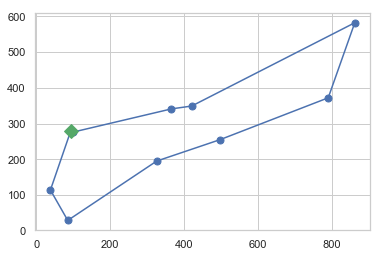

In [18]:
tour = exact_TSP(cities10)
plot_tour(tour)

### Removing redundant tours to increase efficiency
The permutation `(1, 2, 3)` represents the tour that goes from 1 to 2 to 3 and back to 1.  You may have noticed that there aren't really six different tours of three cities: the cities 1, 2, and 3 form a triangle;  any tour must connect the three points of the triangle; and there are really only two ways to do this: clockwise or counterclockwise.   In general, with $n$ cities, there are $n!$ (that is, $n$ factorial) permutations, but only  $(n-1)!$,  tours that are *distinct*: the tours `123`, `231`, and `312` are three ways of representing the *same* tour.

So we can make our `TSP` program $n$ times faster by never considering redundant tours. Arbitrarily, we will say that all tours must start with the "first" city in the set of cities. We don't have to change the definition of `TSP`&mdash;just by making `alltours` return only nonredundant tours, the whole program gets faster.


In [19]:
def all_non_redundant_tours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

def exact_non_redundant_TSP(cieaties):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(all_non_redundant_tours(cities))

In [20]:
all_non_redundant_tours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

### finding time based on First Approach: Exhaustive Search

In [21]:
%timeit exact_TSP(cities8)

161 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit exact_non_redundant_TSP(cities8)

8.52 µs ± 94.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Second approach: Approximate (Heuristic) algorithms

### Greedy approach (Nearest Neighbor approach)
> *Start at any city; at each step extend the tour by moving from the previous city to its nearest neighbor that has not yet been visited.*

This is called a *greedy algorithm*, because it greedily takes what looks best in the short term (the nearest neighbor) even when that won't always be the best in the long term. 

In [23]:
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

In [24]:
def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [25]:
cities = generate_cities(10)

In [26]:
%timeit exact_non_redundant_TSP(cities)

1.91 s ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


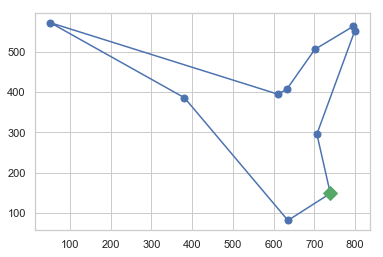

In [27]:
plot_tour(exact_non_redundant_TSP(cities))

In [28]:
%timeit greedy_TSP(cities)

27.8 µs ± 455 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


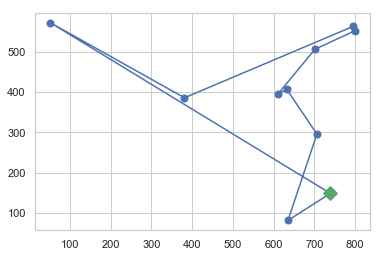

In [29]:
plot_tour(greedy_TSP(cities))

Comparing the time taken to get results for 10 cities, it is clear that greedy approach is efficient compared to the exhaustive search.

A [greedy algorithm](http://en.wikipedia.org/wiki/Greedy_algorithm) is an algorithm that follows the problem solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum. In many problems, a greedy strategy does not in general produce an optimal solution, but nonetheless a greedy heuristic may yield locally optimal solutions that approximate a global optimal solution in a reasonable time.

For many problmes greedy algorithms fail to produce the optimal solution, and may even produce the *unique worst possible solution*.

### A thought on computational complexity

<img src='http://imgs.xkcd.com/comics/travelling_salesman_problem.png' align='center' width='65%'/>


# Biologically inspired metaheuristic: Genetic Algorithm (GA)

- We have already studied GA in our lectures and did practice in our labs for one-max problem
- They are an option in which we dedicate a little more computational effort in order to produce better solutions than `greedy_TSP()`.

> We will be using the [DEAP](https://github.com/DEAP/deap) library to code this tackle this problem using a genetic algorithm. We have used DEAP in practical classes in this unit.

[<img src='https://raw.githubusercontent.com/DEAP/deap/master/doc/_static/deap_long.png' width='29%' align='center'/>](https://github.com/DEAP/deap)

In [30]:
from deap import algorithms, base, creator, tools

In [31]:
num_cities = 30
cities = generate_cities(num_cities)

In [32]:
toolbox = base.Toolbox()

In [33]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [34]:
toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

In [35]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

In [36]:
def create_tour(individual):
    return [list(cities)[e] for e in individual]

In [37]:
def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

In [38]:
toolbox.register("evaluate", evaluation)

In [39]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [40]:
pop = toolbox.population(n=100)

In [41]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)

CPU times: user 7.08 s, sys: 0 ns, total: 7.08 s
Wall time: 7.14 s


Let's check the efficiency of GA

In [42]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

Fitness of the best individual:  3520.7339574784537


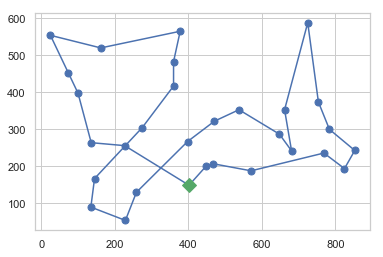

In [43]:
plot_tour(create_tour(best_individual))

It is interesting to assess how the fitness of the population changes as the evolution process proceeds. 

We can prepare a `deap.tools.Statistics` instance to specify what data to collect. 

In [44]:
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.min)

In [45]:
result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=400, verbose=False,
                                  stats=fit_stats)

#### Plotting mean and minimum fitness values as evolution proceeds

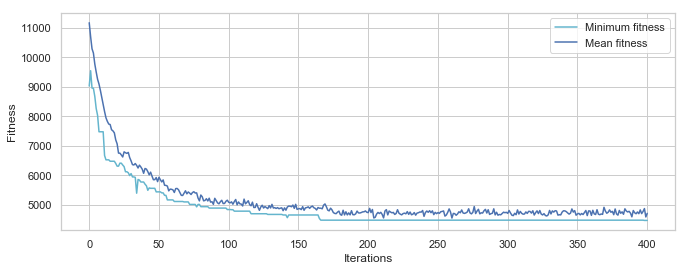

In [40]:
plt.figure(figsize=(11, 4))
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-')
plt.legend(plots, ('Minimum fitness', 'Mean fitness'), frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Iterations');

### Q1. Compare the efficiency (time taken) of Exhaustive search, greedy search and Genetic Algorithm for 30 cities based on the configuration of your machine. If necessary, use estimates, but detail the reason for, and the basis of, the estimates used.  [ 1 Marks]

In [41]:
#%%time
#result = exact_non_redundant_TSP(cities)
#The amount of distances is 30 factorial, which would take more time to compute than the age of the universe

In [42]:
%%time 
result = greedy_TSP(cities)

CPU times: user 309 µs, sys: 2 µs, total: 311 µs
Wall time: 318 µs


In [43]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)
tools.selBest(result, k=1)[0]

CPU times: user 7.73 s, sys: 0 ns, total: 7.73 s
Wall time: 7.83 s


### Q2. Analyse the effect of population size for the above experiment. Try population size having value [25, 50, 75, 100, 125, 150, 175, 200] [ 1.5 Marks]

In [44]:
#population_results = []
averaging_amount = 5
for i in [25,50,75,100,125,150,175,200]:
    total = 0
    for _ in range(averaging_amount):
        pop = toolbox.population(n=i)
        result, log = algorithms.eaSimple(pop, toolbox,
                                         cxpb=0.8, mutpb=0.2,
                                         ngen=400, verbose=False)
        best_individual = tools.selBest(result,k=1)[0]
        total += evaluation(best_individual)[0]
    print("Population size:", i, "Average:", total/averaging_amount)
    #population_results.append((i,total/averaging_amount))


Population size: 25 Average: 4670.387721925416
Population size: 50 Average: 3877.2669696754697
Population size: 75 Average: 3791.978124369535
Population size: 100 Average: 3781.5312650840597
Population size: 125 Average: 3674.209804646848
Population size: 150 Average: 3770.880265195881
Population size: 175 Average: 3594.3042169170644
Population size: 200 Average: 3616.7988252081086


### Q3. What is the influence  of mutation probability and cross-over probability over the performance of  GA. [ 1.5 Marks]

In [45]:
cross_mutation_results = []
pop = toolbox.population(n=50)

for co in range(1,11):
    for mu in range(1,11):
        result, log = algorithms.eaSimple(pop, toolbox,
                                     cxpb=1/co, mutpb=1/mu,
                                     ngen=400, verbose=False)
        best_individual = tools.selBest(result,k=1)[0]
        result = evaluation(best_individual)[0]
        print("Crossover: %.2f Mutation: %.2f Result: %f" % (1/co,1/mu,result))
        cross_mutation_results.append((co,mu,result))
    print()

minimum = sorted(cross_mutation_results,key=lambda x: x[2])[0]
print("Best Crossover: %.2f Mutation: %.2f Result: %f" % (1/minimum[0],1/minimum[1],minimum[2]))
    

Crossover: 1.00 Mutation: 1.00 Result: 8027.927074
Crossover: 1.00 Mutation: 0.50 Result: 5450.769423
Crossover: 1.00 Mutation: 0.33 Result: 3686.883027
Crossover: 1.00 Mutation: 0.25 Result: 3543.713078
Crossover: 1.00 Mutation: 0.20 Result: 3543.713078
Crossover: 1.00 Mutation: 0.17 Result: 3543.713078
Crossover: 1.00 Mutation: 0.14 Result: 3543.713078
Crossover: 1.00 Mutation: 0.12 Result: 3543.713078
Crossover: 1.00 Mutation: 0.11 Result: 3543.713078
Crossover: 1.00 Mutation: 0.10 Result: 3543.713078

Crossover: 0.50 Mutation: 1.00 Result: 6754.547826
Crossover: 0.50 Mutation: 0.50 Result: 4069.671577
Crossover: 0.50 Mutation: 0.33 Result: 3613.809150
Crossover: 0.50 Mutation: 0.25 Result: 3613.809150
Crossover: 0.50 Mutation: 0.20 Result: 3613.809150
Crossover: 0.50 Mutation: 0.17 Result: 3613.809150
Crossover: 0.50 Mutation: 0.14 Result: 3613.809150
Crossover: 0.50 Mutation: 0.12 Result: 3613.809150
Crossover: 0.50 Mutation: 0.11 Result: 3613.809150
Crossover: 0.50 Mutation: 0.10

### Extending GA to real data

We are given a set of 14 GPS positions, each coordinate representing a city in Burma (Officially the Republic of the Union of Myanmar). Our objective is to solve the TSP problem over these 14 cities. You need to do bit of independent research for finding the formula to convert the GPS coodinates of two cities (in latitudes and longitudes) to the actual distance between those two cities.

City[i] = {LAT[i], LON[i]}

In [92]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
        17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
        96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]


### Q4. Calculate the total distance (in Kilometres) of a tour starting with city[0], going in the order given to city[1], city[2], ... city[13] and coming back to city[0],  based on *Latitude* and *Longitude* of the 14 cities above. [2 Marks] 

In [93]:
#from geopy import distance

#Create tuple from complex
#def ctot(c):
#    return (c.real,c.imag)

#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
from math import radians, cos, sin, asin, sqrt

def haversine(p1, p2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1,lon1,lat2,lon2 = p1.real,p1.imag,p2.real,p2.imag
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371.009 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def total_distance(path):
    return (sum([haversine(path[i-1],v) for i,v in enumerate(path)]),)

cities = list(map(lambda x: City(x[0],x[1]), zip(LAT,LON)))
print("Total distance from 0 to 14: %fkm" % total_distance(cities)[0])

Total distance from 0 to 14: 4637.200844km


### Q5. Provide the optimal route you found employing GA, and its length in kilometers.  [2 Marks]

Genetic best distance 17451.803434km
[9, 4, 9, 4, 9, 4, 9, 4, 9, 4, 9, 4, 9, 4]
Best path: 9 4 9 4 9 4 9 4 9 4 9 4 9 4


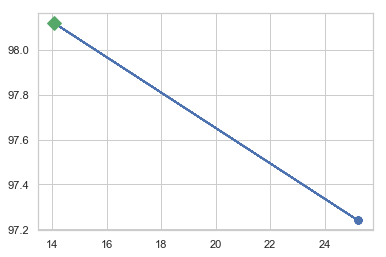

In [94]:
def create_path(individual):
    return [cities[e] for e in individual]

def evaluation(individual):
    return total_distance(create_path(individual))

def join_individual(individual):
    print(individual)
    return ' '.join([str(e) for e in individual])

#creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
#creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)
toolbox.register("evaluate", evaluation)

#toolbox.register("mate", tools.cxOrdered)
#toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

pop = toolbox.population(n=200)
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.9, mutpb=0.1,
                             ngen=400, verbose=False)

genetic_best = tools.selBest(result, k=1)[0]
print("Genetic best distance %fkm" % evaluation(genetic_best)[0])
print("Best path:", join_individual(genetic_best))
plot_tour(create_path(genetic_best))

From just looking at the shortest path, it looks like we have a path that is the most optimal, however the only way to be sure would be to generate every path and test them one by one, however due to the fact that this is 14 cities and thus the amount of combinations is 14 factorial we aren't going to prove that this is the optimal path anytime soon.

However, using this Github repository (https://github.com/yihui-he/TSP) and modifying it a little for how it calculates distances. Simulated Annealing gives the same distance and path and 2-Opt is a close estimate, so this is probably a optimal path.

Size 14
2-Opt
secs 0.0128118991852
3497.97512127
SA
secs 37.3603200912
3354.52787625 0
7 10 8 9 0 1 13 2 3 4 5 11 6 12


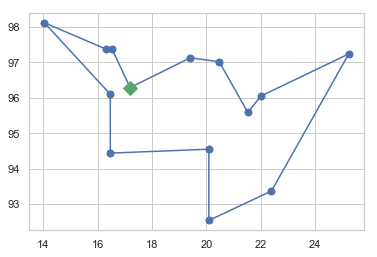

In [70]:
github_tsp_best_path = [int(x) for x in "7 10 8 9 0 1 13 2 3 4 5 11 6 12".split()]
plot_tour(create_path(github_tsp_best_path))

### Q6. Describe your fitness function, and the way you encoded the potential solutions. [2 Marks]

### Q7. Provide the configuration of the GA you finally used, namely, mutation probability, crossover probability, population size, type of selection, type of mutation, type of crossover, and number of generations. [2 Marks]

## Solving Tic-Tac-Toe using Genetic Algorithm (GA)
The game of Tic Tac Toe (2D) is played on a 3 by 3 grid.  One player marks her squares with an X, and the other with an O.  The players alternate, placing their marks on an empty cell on the grid with the hope of winning the game.  The winner of the game is the first player to place 3 of their marks in a line (row, column, and diagnoal).  If the entire grid is filled with marks, and there is no winner, the game is declared a draw.  Your task is to create a player to play the 3D version of this game without any knowledge of strategies for playing Tic Tac Toe.  The only rule that is known to this evolving player is that the players alternate their turns, and when it is the evolving player’s turn, it could only place its own mark on an empty spot in the grid. We have already implemented Negamax algorithm to play 3D tic-tac-toe in one of the practicals. In this assignment, we try to solve 3D (3 x 3 x 3) Tic-Tac-Toe game using Genetic Algorithm (GA). 

### 3D (3 x 3 x 3) tic-tac-toe
<img src="3d_tic-tac-toe-3d.jpg" style="width: 200px"/>

### Q8. How did you approach the problem of representing the solution space, and why?  Did you face any specific problem for this – for instance, choosing between different possible representations? How did you overcome any such problem? Give as example how, in your approach, Tic-Tac-Toe (3D version) will be represented, and explain clearly how one can read off the strategy for Tic-Tac-Toe from this “chromosome”. [2 Marks] 

### Q9. What  fitness  function  did you  choose  to  go  with  your  approach,  and  why?   As  before, describe if you faced any specific problem in this context, and how you overcame it. [1 Marks]

### Q10. What parameters for Genetic algorithm did you choose?  For instance what type of crossover did you choose,  with what probability,  and why?  Also outline how you determined that the solution you received is good enough. [2 Marks]

### Q11. Provide your complete code for solving 3D (3 x 3 x 3) Tic-Tac-Toe using Genetic Algorithm. Note that this code should be complete (should not call any methods from the above code for solving TSP). You need to design the layout of the game either in console (command prompt) or Graphical User Interface (GUI) so that human (one of the players) can play against the AI machine (GA). [ 3 Marks]

### On execution of your code:
- it asks the human to pick one of {X, O} as their preferred mark. 
- it lets the human player choose who would start the game.
- After the game is over, it displays the result (who wins/loses or it ended in a draw)

In [90]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

def evaluation(f):
    return (abs(sum(f)-5),)

toolbox = base.Toolbox()

#w=np.random.randn(layer_size[l],layer_size[l-1])*np.sqrt(2/layer_size[l-1])

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=10)

toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)
toolbox.register("evaluate", evaluation)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3) 

pop = toolbox.population(n=100)
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)
result = tools.selBest(result, k=1)[0]
print(result)
print(sum(result))

from sklearn.neural_network import MLPClassifier

class MLPClassifierOverride(MLPClassifier):
    def init_weights(self, coefs, intercepts):
        self.coefs = coefs
        self.intercepts = intercepts
    
    # Overriding _init_coef method
    def _init_coef(self, fan_in, fan_out):
        if self.activation == 'logistic':
            init_bound = np.sqrt(2. / (fan_in + fan_out))
        elif self.activation in ('identity', 'tanh', 'relu'):
            init_bound = np.sqrt(6. / (fan_in + fan_out))
        else:
            raise ValueError("Unknown activation function %s" %
                             self.activation)

        print(init_bound)
        print(fan_in, fan_out)
        print()
            
        #coef_init = self.coefs
        #intercept_init = self.intercepts
        
        coef_init = self._random_state.uniform(-init_bound, init_bound,
                                               (fan_in, fan_out))
        intercept_init = self._random_state.uniform(-init_bound, init_bound,
                                                    fan_out)

        return coef_init, intercept_init
    
mlp = MLPClassifierOverride()

/usr/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[0.012939119027621238, 0.012939119027621238, 0.012939119027621238, 0.012939119027621238, 0.012939119027621238, 0.012939119027621238, 0.012939119027621238, 0.012939119027621238, 0.012939119027621238, 0.012939119027621238]
0.12939119027621238
[[ 1.87756309  0.56839425]
 [ 0.36877983 -0.34894509]
 [ 0.96515318  0.10921819]
 [ 0.48599685  0.20291313]
 [ 1.72532644  0.53367598]
 [ 1.47976586  0.08726406]
 [ 2.11889248  0.60498388]
 [-0.74017805  0.49615542]
 [-0.38099245  1.34740194]
 [ 0.22944941  0.87981305]
 [ 1.31311917 -0.69665985]
 [ 0.87435391  0.83750547]
 [ 0.77145295 -0.69709227]
 [ 1.26285558  0.12916271]
 [-0.71988634  0.69106791]
 [ 0.79205253 -0.40516241]
 [ 1.31886119 -0.41396289]
 [ 0.26579093  0.78151982]
 [ 0.08686038  0.49400243]
 [-0.74872343 -0.06972957]
 [ 0.88404174 -0.35425773]
 [ 1.02671711  0.73292915]
 [ 0.73867317  0.30808589]
 [ 1.12856036  0.33191968]
 [ 1.15536561 -0.50593577]
 [ 1.56825139 -0.05911358]
 [ 0.29004812  1.00820293]
 [ 0.64076308 -0.19860992]
 [-

/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
def get_input(message,valid):
    print(message,end='')
    s = input().lower()
    while True:
        if (valid(s)):
            return s
        print("\nInvalid input")
        print(message,end='')
        s = input().lower()
        
def print_boards(boards):
    for row in range(size):
        string = ""
        for board in boards:
            v = board[row]
            def check(x):
                if x is None:
                    return " "
                elif x:
                    return "X"
                return "O"
            v = map(check,v)
            string += "|" + "|".join(v) + "|   "    
        print(string.strip())

def check_valid_move(s):
    try:
        a,b,c = map(int,s.split())
        if ((a<0 or a>=size) or 
            (b<0 or b>=size) or 
            (c<0 or c>=size)):
            return False
        return boards[a][c][b] is None
    except:
        return False
    
def check_boards(move, check):
    x,y = move[1],move[2]
    board = boards[move[0]]
    board_transposed = list(zip(*board))
    
    #Normal board
    column_win = all([cell==check for cell in board[y]])
    if (column_win):
        return True
    row_win = all([cell==check for cell in board_transposed[x]])
    if (row_win):
        return True
    
    #TODO: Diagonals will need to be adapted with size ever changes
    diagonal1_win = all([board[i][i]==check for i in range(size)])
    if (diagonal1_win):
        return True
    diagonal2_win = all([board[-i-1][i]==check for i in range(size)])
    if (diagonal2_win):
        return True
    
    #3D Board 
    up_win = all([boards[i][y][x]==check for i in range(size)])
    if (up_win):
        return True
    
    #3D Diagonals
    down_win = all([boards[i][i][x]==check for i in range(size)])
    if (down_win):
        return True
    right_win = all([boards[i][y][i]==check for i in range(size)])
    if (right_win):
        return True
    
    down_right_win = all([boards[i][i][i]==check for i in range(size)])
    if (down_right_win):
        return True
    down_left_win = all([boards[i][i][-i-1]==check for i in range(size)])
    if (down_left_win):
        return True

def move_ends_game(move):
    return check_boards(move,True) or check_boards(move,False)

def move_ties_game():
    return not any([cell is None for board in boards for row in board for cell in row])

def get_computer_move():
    pass

#message = "Do you want to be Crosses or Noughts [X/O]: "
#human_is_cross = get_input(message,lambda x: x in ['x','o']) == 'x'

#message = "Human starts or computer starts? [H/C]: "
#human_move = get_input(message,lambda x: x in ['h','c']) == 'h'

human_is_cross = True
human_move = True

size = 3
boards = [[[None]*size for _ in range(size)] for _ in range(size)]

#boards[0][0][2] = True
#boards[0][2][2] = False
#boards[0][0][0] = True

#move = get_perfect_computer_move()
#print(move)

move_counter = 0
while True:
    print_boards(boards)
    if (human_move):
        move_raw = get_input("Enter move seperated by spaces (board x y) ", check_valid_move)
        move = list(map(int,move_raw.split()))
        board,x,y = move

        boards[board][y][x] = human_is_cross
        human_move = False
    else:
        #move = get_perfect_computer_move()
        #print(move)
        #move = move[1]
        move_raw = get_input("IM ROBOT", check_valid_move)
        move = list(map(int,move_raw.split()))
        
        boards[move[0]][move[2]][move[1]] = not human_is_cross
        human_move = True

    move_counter += 1
    if (move_counter >= size**3):
        print_boards(boards)
        print("It's a draw!")
        break

    if (move_ends_game(move)):
        print_boards(boards)
        print("Computer wins!" if human_move else "Player wins!")
        break


In [ ]:
# Put your analysis here.

## Your Submission method

Your submission should consist of this jupyter notebook with all your code and explanations inserted in the notebook. The notebook should contain the output of the runs so that it can be read by the assessor without needing to run the output.

You have already used Jupyter Notebook earlier in the unit. In case you need help, you may refer the following tutorial https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook .

Late submissions may attract penalty in accordance with the assessment policy outlined in the unit guide.

Each question specifies a mark. The final mark of the assignment is the sum of all the individual marks, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per the [academic honesty policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-honesty).